# Exercise 1: Linear Regression

In [182]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Part 1: Plotting 


In [183]:
data = pandas.read_csv('ex1data1.txt', header=None, names=['population', 'profit'])

In [184]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [185]:
data.shape

(97, 2)

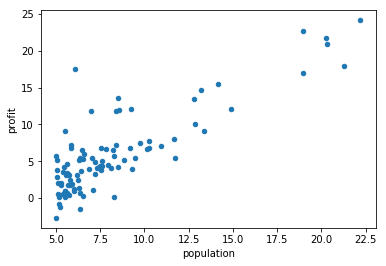

In [186]:
data.plot(x='population', y='profit', kind='scatter')

## Part 3: Gradient descent

In this part, you will fit the linear regression parameters θ to our dataset using gradient descent.<br>
The objective of linear regression is to minimize the cost function<br><br>

<center>$J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^m \:({h}_\theta{x}^{(i)}-{y}^{(i)})^2$</center><br><br>

where the hypothesis hθ(x) is given by the linear model<br><br>
<center>${h}_\theta{(x)}=\theta^Tx=\theta_0+\theta_1x_1$</center><br><br>

Recall that the parameters of your model are the θj values. These are the values you will adjust to minimize cost J(θ). One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update<br><br>

<center>$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum\limits_{i=1}^m \:({h}_\theta{(x}^{(i)})-{y}^{(i)})x_j^{(i)}$</center><br><br>


In [187]:
# Adding a column of ones to the dataset
data.insert(0, 'ones', 1.)
data.head()

,ones,population,profit
0,1.0,6.1101,17.5920
1,1.0,5.5277,9.1302
2,1.0,8.5186,13.6620
3,1.0,7.0032,11.8540
4,1.0,5.8598,6.8233


Initialize fitting parameters:

In [188]:
theta = np.zeros(2)

Gradient descent settings:

In [189]:
iterations = 1500
alpha = 0.01

Getting the pandas data as raw numpy arrays:

In [190]:
X = data[['ones', 'population']].values
Y = data['profit'].values
m = len(data)
print Y.shape

(97,)


In [191]:
def cost(X, y, theta):
    # COMPUTECOST Compute cost for linear regression
    # J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    # parameter for linear regression to fit the data points in X and y
        
    # some useful values
    m = len(X)
    
    # You need to return this value correctly:
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    J = (np.sum(np.power((np.dot(X, theta) - y), 2)))/(2 * m)
    

    # ============================================================
    return J

Cost at initial theta:<br>
You shoud expect to see a cost of 32.07

In [192]:
cost(X, Y, theta)

32.072733877455676

In [193]:
def gradient_descent_func(X, y, theta, alpha, num_iters):
    # GRADIENTDESCENT Performs gradient descent to learn theta
    # theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    # taking num_iters gradient steps with learning rate alpha
    
    # Initialize
    J_his = np.zeros((num_iters,))
    T_his = np.zeros((num_iters,2))
    m = len(y)    
    for i in range(num_iters):
        T_his[i] = theta

        ### ========= YOUR CODE HERE ============
        # Instructions: Perform a single gradient step on the parameter vector theta.
        
        theta -= np.multiply(alpha/m, (np.dot(X.T, np.dot(X, theta) - y)))        

        ### =====================================
        J_his[i] = cost(X, y, theta)
    return theta, J_his, T_his

Run gradient descent:

In [194]:
theta, J_his, T_his = gradient_descent_func(X, Y, theta, alpha, iterations)

Theta found by gradient descent:

In [195]:
theta

array([-3.63029144,  1.16636235])

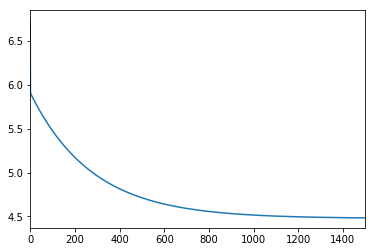

In [196]:
pandas.Series(J_his).plot()

Predicting profit for population size 35000 and 70000:

In [197]:
np.array([1, 3.5]).dot(theta) * 10000

4519.7678677017675

In [198]:
np.array([1, 7]).dot(theta) * 10000

45342.450129447141

## Part 4: Visualizing J(theta_0, theta_1) 

In [199]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-1, 4, 100))

In [206]:
print yy.shape

(100, 100)


In [200]:
J_vals = np.zeros(xx.shape)

In [202]:
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        J_vals[i, j] = cost(X, Y, np.array([xx[i,j], yy[i,j]]))

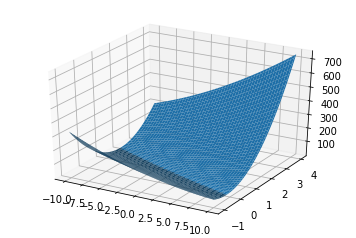

In [203]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, J_vals)

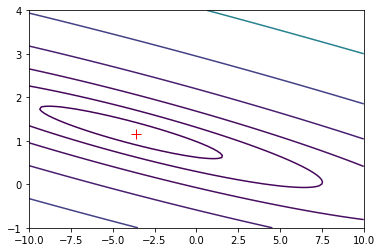

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(xx, yy, J_vals, levels=np.logspace(-2, 3, 15))
ax.plot(theta[0], theta[1], 'r+', markersize=10)

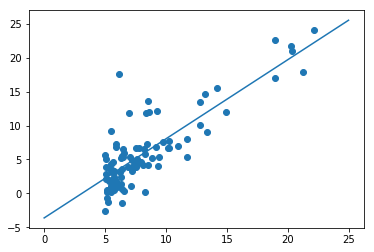

In [208]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data.population, data.profit)
Xs = np.linspace(0,25,100)
def Ys(theta):
    return theta[0] + Xs*theta[1]
ax.plot(Xs, Ys(theta))

In [209]:
T_his

array([[ 0.        ,  0.        ],
       [ 0.05839135,  0.6532885 ],
       [ 0.06289175,  0.77000978],
       ..., 
       [-3.62885054,  1.1662176 ],
       [-3.6293317 ,  1.16626593],
       [-3.62981201,  1.16631419]])

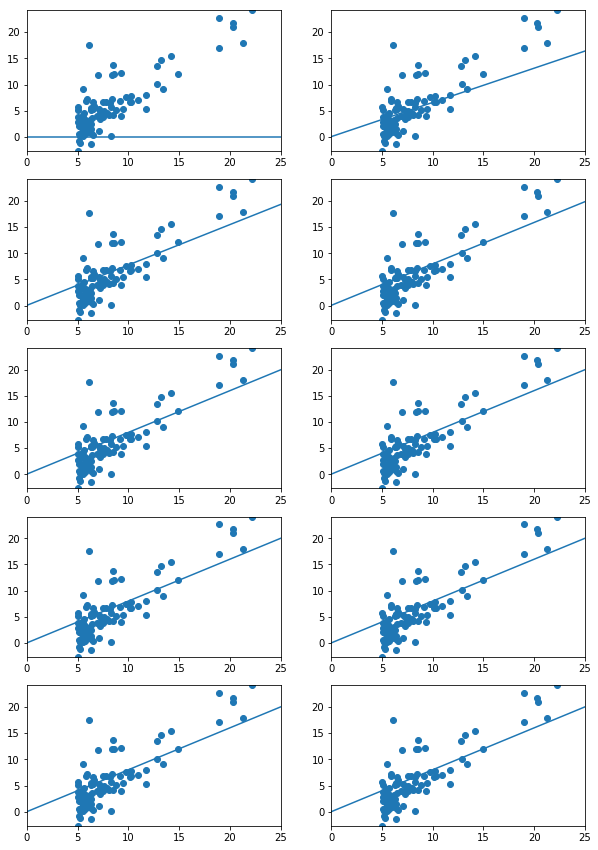

In [210]:
fig = plt.figure(figsize=(10,15))
for i, t in enumerate(T_his[:10]):
    ax = fig.add_subplot(5,2,i+1)
    ax.autoscale(tight=True)
    ax.scatter(data.population, data.profit)
    ax.plot(Xs, Ys(t))